In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

시도별 의료인력 현황, 시도별 종별 의료기관 현황, 의료시설 유형별 평균접근시간 그래프

In [93]:
hospital = pd.read_csv('../../Data/public health/hosik_병원수_2009_2022.csv', index_col='시점')
hosPeople = pd.read_csv('../../Data/public health/hosik_의료인_2010_2021.csv', index_col='시점')

In [79]:
# 시도별 이름을 바꾸기 위한 변수
preAreaName=[
    '서울','부산','대구', '인천', '광주', '대전', '울산','세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주']
NexAreaName = [
 '서울특별시','부산광역시','대구광역시', '인천광역시','광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도',
 '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

In [99]:
print(hospital['시도별'].unique())
print(hosPeople['시도별'].unique())

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주' '세종']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주' '계' '세종']


In [81]:
resultDF = pd.merge(left=hospital, right=hosPeople, how='left', on=['시점','시도별'])
resultDF

,병원,상급종합병원,종합병원,의원,시도별,의사,치과의사,한의사,약사,간호사,기타보건의료인
시점,,,,,,,,,,,
2009,167,17,42,7142,서울,NaN,NaN,NaN,NaN,NaN,NaN
2009,103,4,22,2065,부산,NaN,NaN,NaN,NaN,NaN,NaN
2009,98,4,7,1460,대구,NaN,NaN,NaN,NaN,NaN,NaN
2009,50,2,12,1313,인천,NaN,NaN,NaN,NaN,NaN,NaN
2009,49,2,17,826,광주,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022,62,2,12,1190,전북,NaN,NaN,NaN,NaN,NaN,NaN
2022,73,1,25,958,전남,NaN,NaN,NaN,NaN,NaN,NaN
2022,56,0,20,1296,경북,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# column 이름 순서 재정의
resultDF = resultDF[['시도별','의원', '병원','종합병원', '상급종합병원', '의사', '치과의사', '한의사', '약사', '간호사',
       '기타보건의료인']]
# 시도별 재정의
resultDF.replace(preAreaName,NexAreaName, inplace=True)
resultDF

,시도별,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인
시점,,,,,,,,,,,
2009,서울특별시,7142,167,42,17,NaN,NaN,NaN,NaN,NaN,NaN
2009,부산광역시,2065,103,22,4,NaN,NaN,NaN,NaN,NaN,NaN
2009,대구광역시,1460,98,7,4,NaN,NaN,NaN,NaN,NaN,NaN
2009,인천광역시,1313,50,12,2,NaN,NaN,NaN,NaN,NaN,NaN
2009,광주광역시,826,49,17,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022,전라북도,1190,62,12,2,NaN,NaN,NaN,NaN,NaN,NaN
2022,전라남도,958,73,25,1,NaN,NaN,NaN,NaN,NaN,NaN
2022,경상북도,1296,56,20,0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df = resultDF.copy()

In [15]:
df['시점'] = df.index
df.set_index('시도별', inplace=True,drop=True)
df

,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인,시점
시도별,,,,,,,,,,,
서울,7328,171,42,17,23077.0,5933.0,3937.0,7667.0,28634.0,4553.0,2010
부산,2071,109,24,4,6247.0,1300.0,1134.0,2194.0,9268.0,1894.0,2010
대구,1496,101,8,4,4597.0,1055.0,840.0,1679.0,6143.0,1280.0,2010
인천,1321,55,12,2,3212.0,874.0,606.0,1356.0,4364.0,1375.0,2010
광주,839,53,19,2,2723.0,783.0,393.0,951.0,4538.0,870.0,2010
...,...,...,...,...,...,...,...,...,...,...,...
전북,1190,62,12,2,NaN,NaN,NaN,NaN,NaN,NaN,2022
전남,958,73,25,1,NaN,NaN,NaN,NaN,NaN,NaN,2022
경북,1296,56,20,0,NaN,NaN,NaN,NaN,NaN,NaN,2022


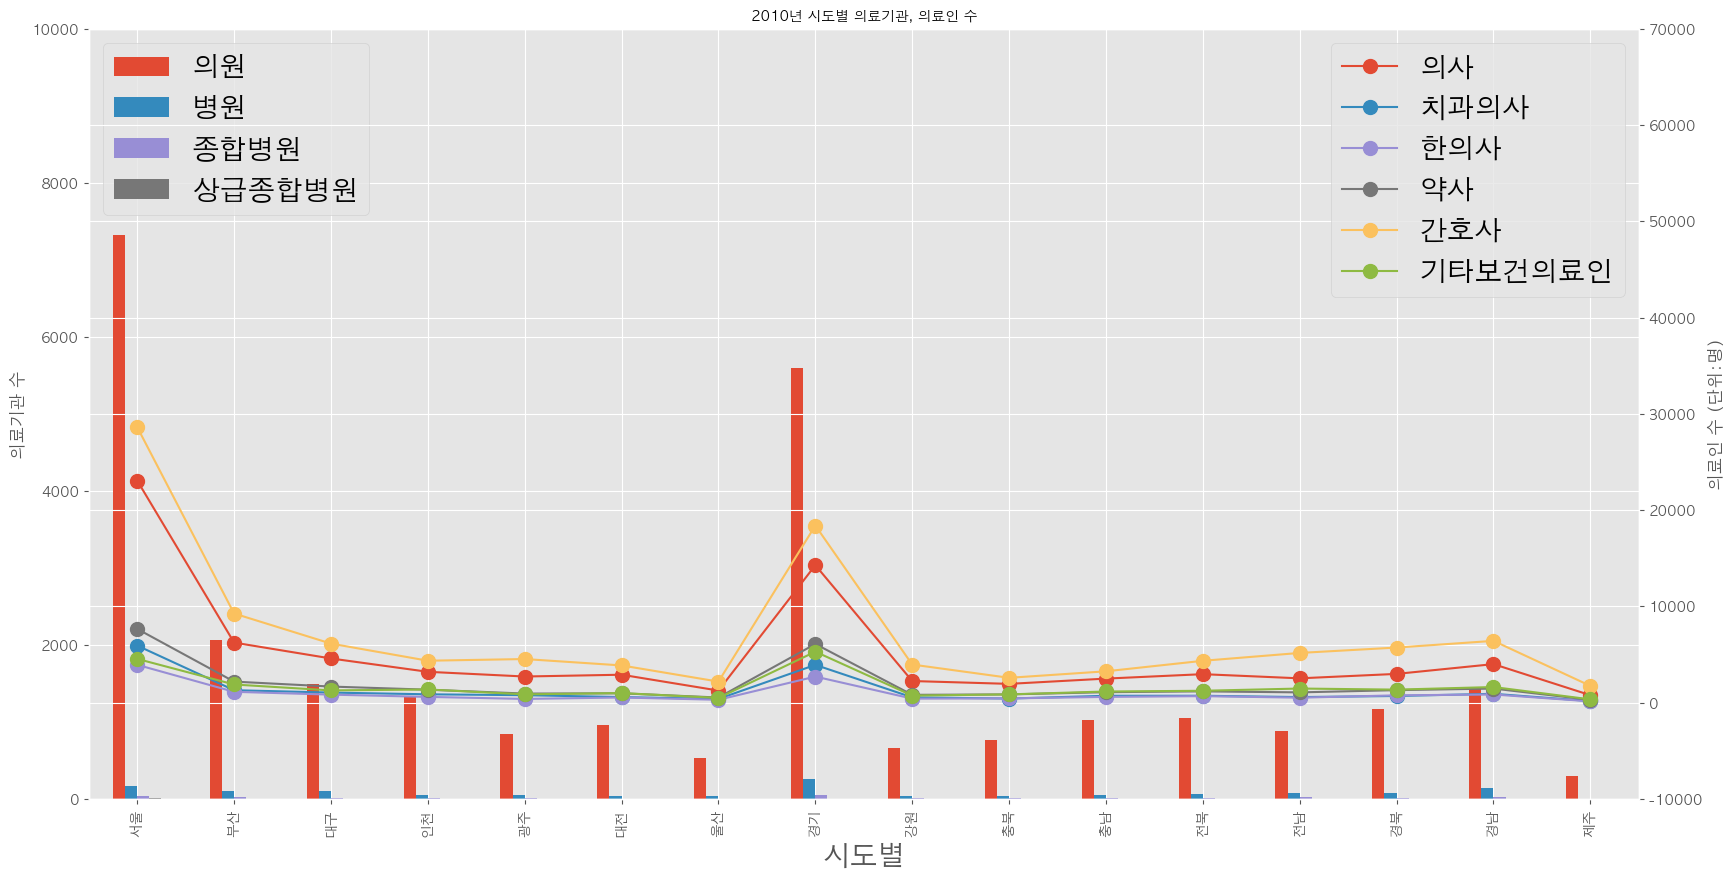

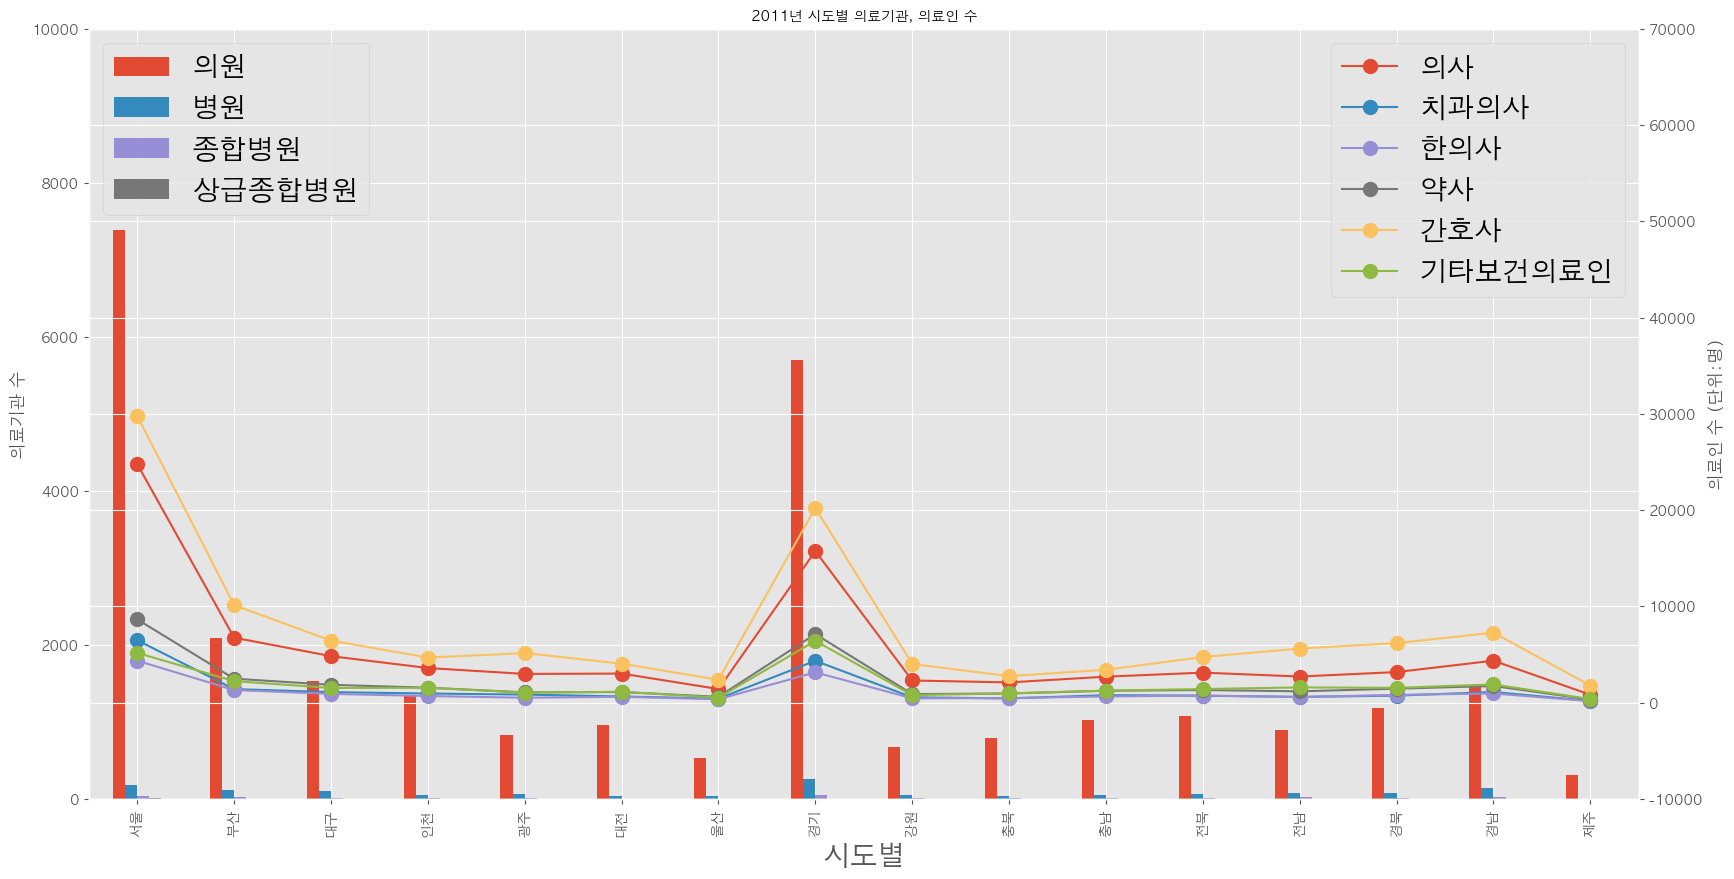

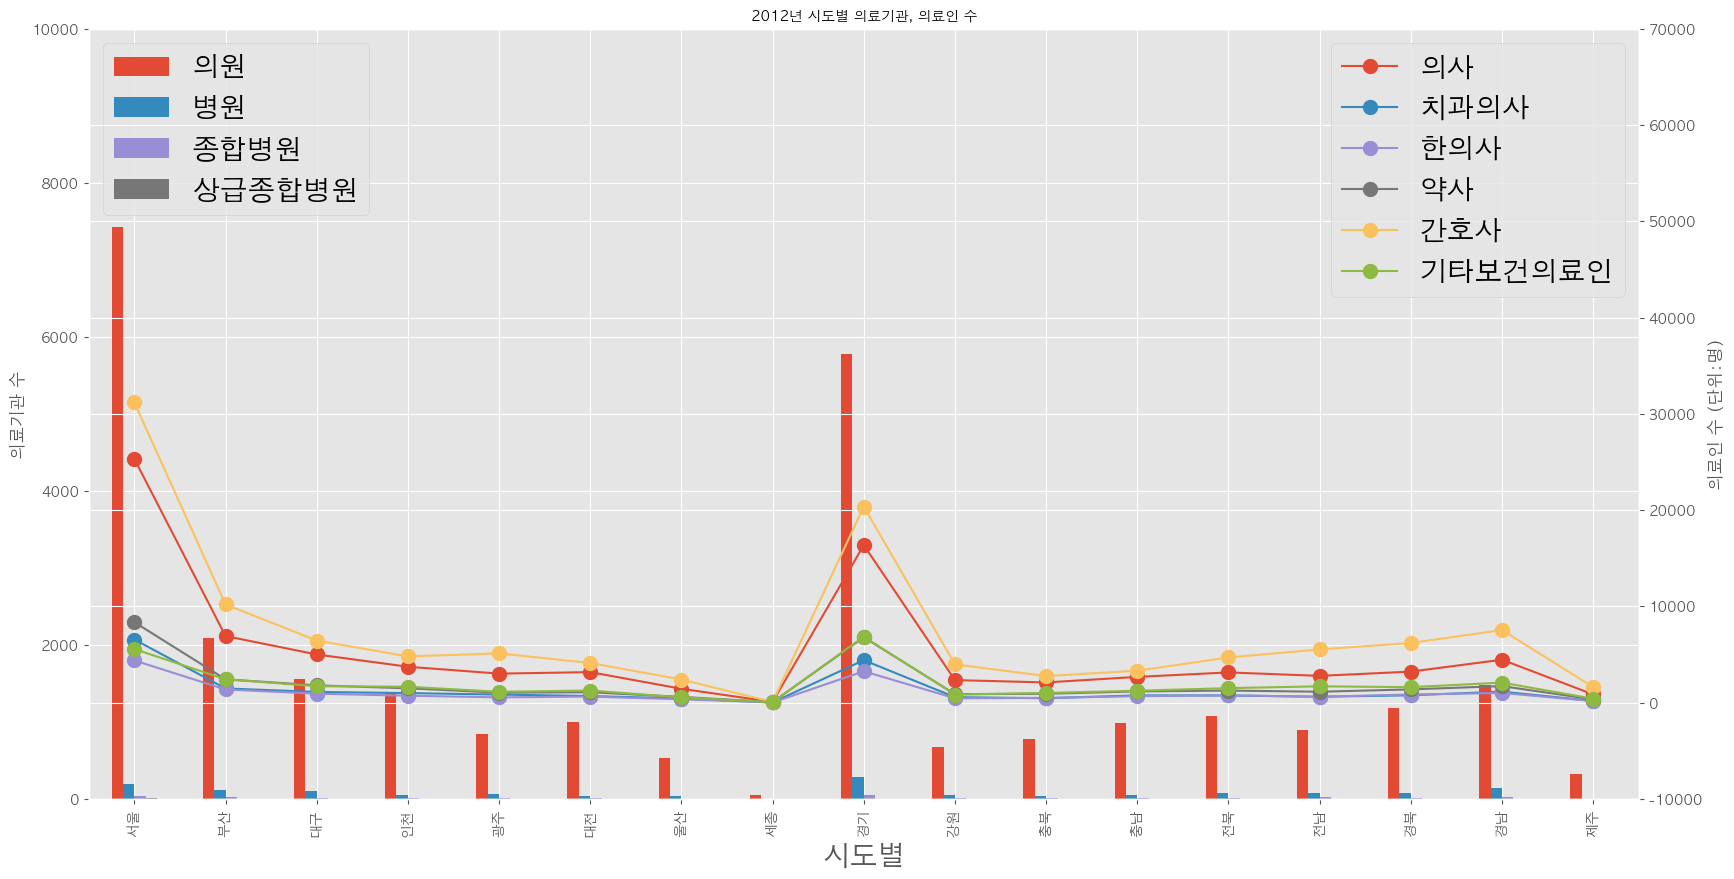

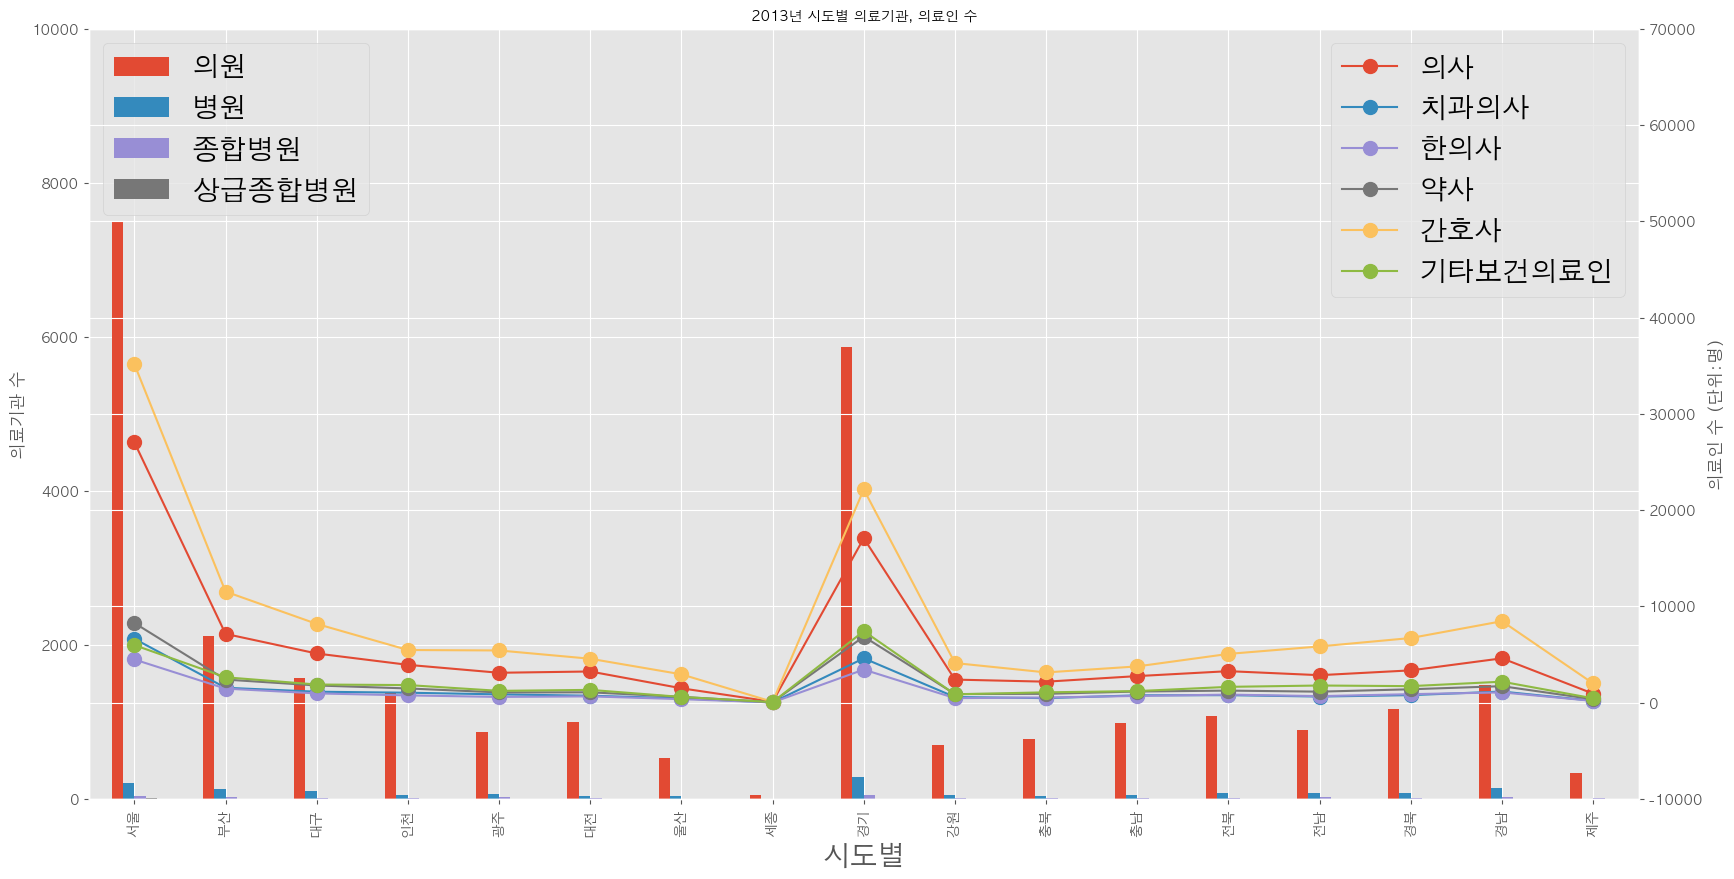

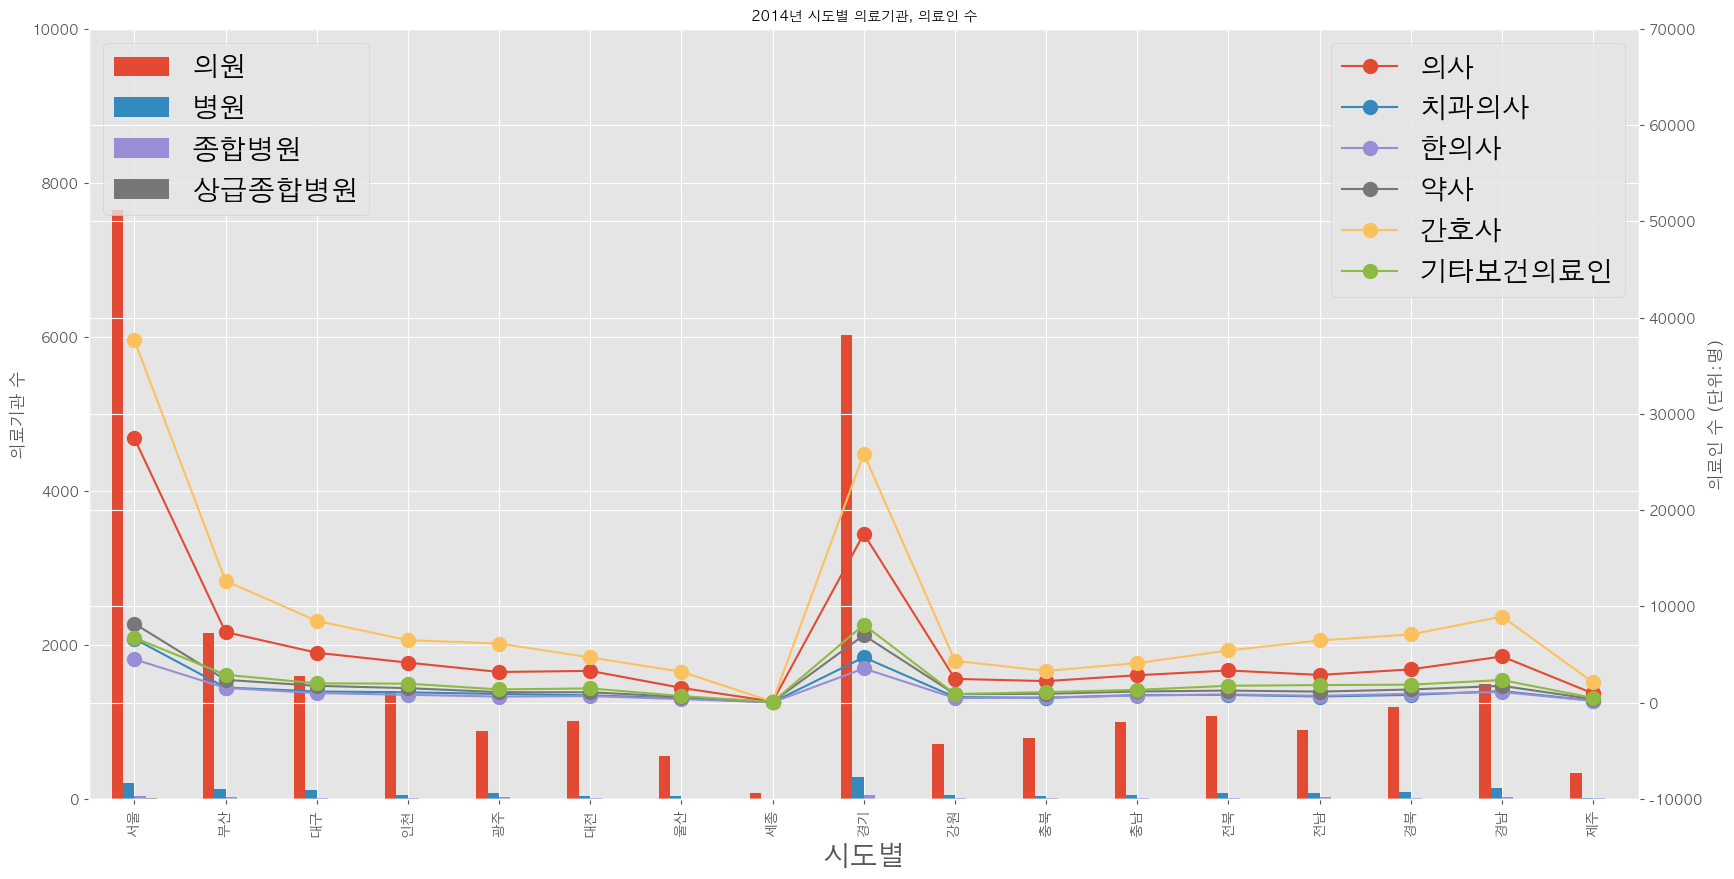

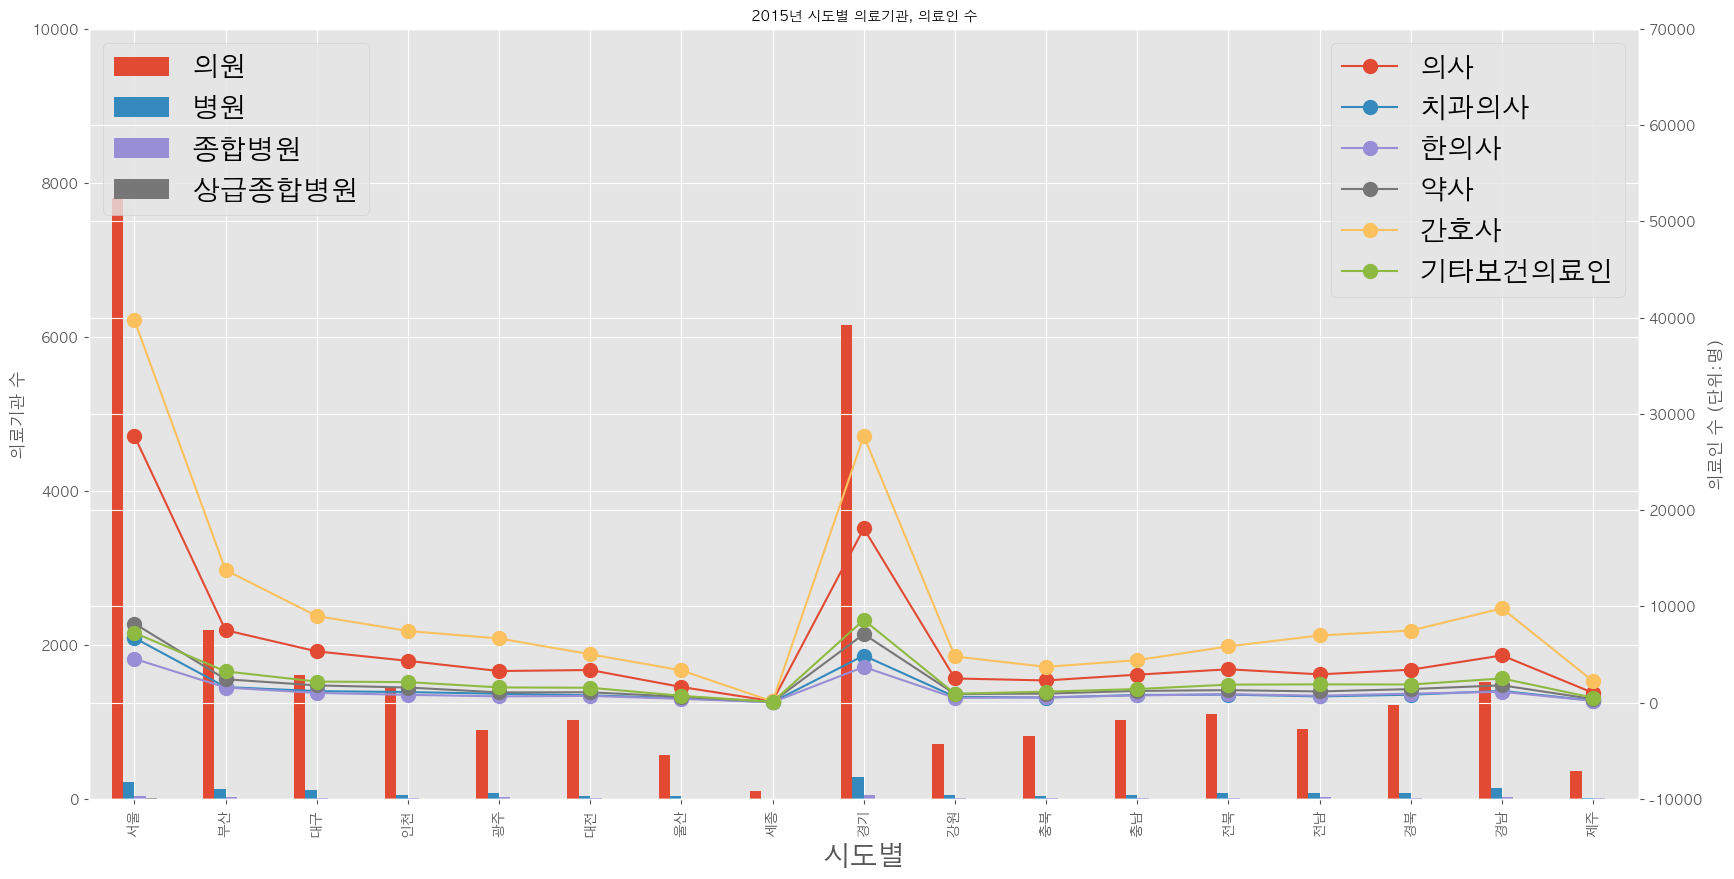

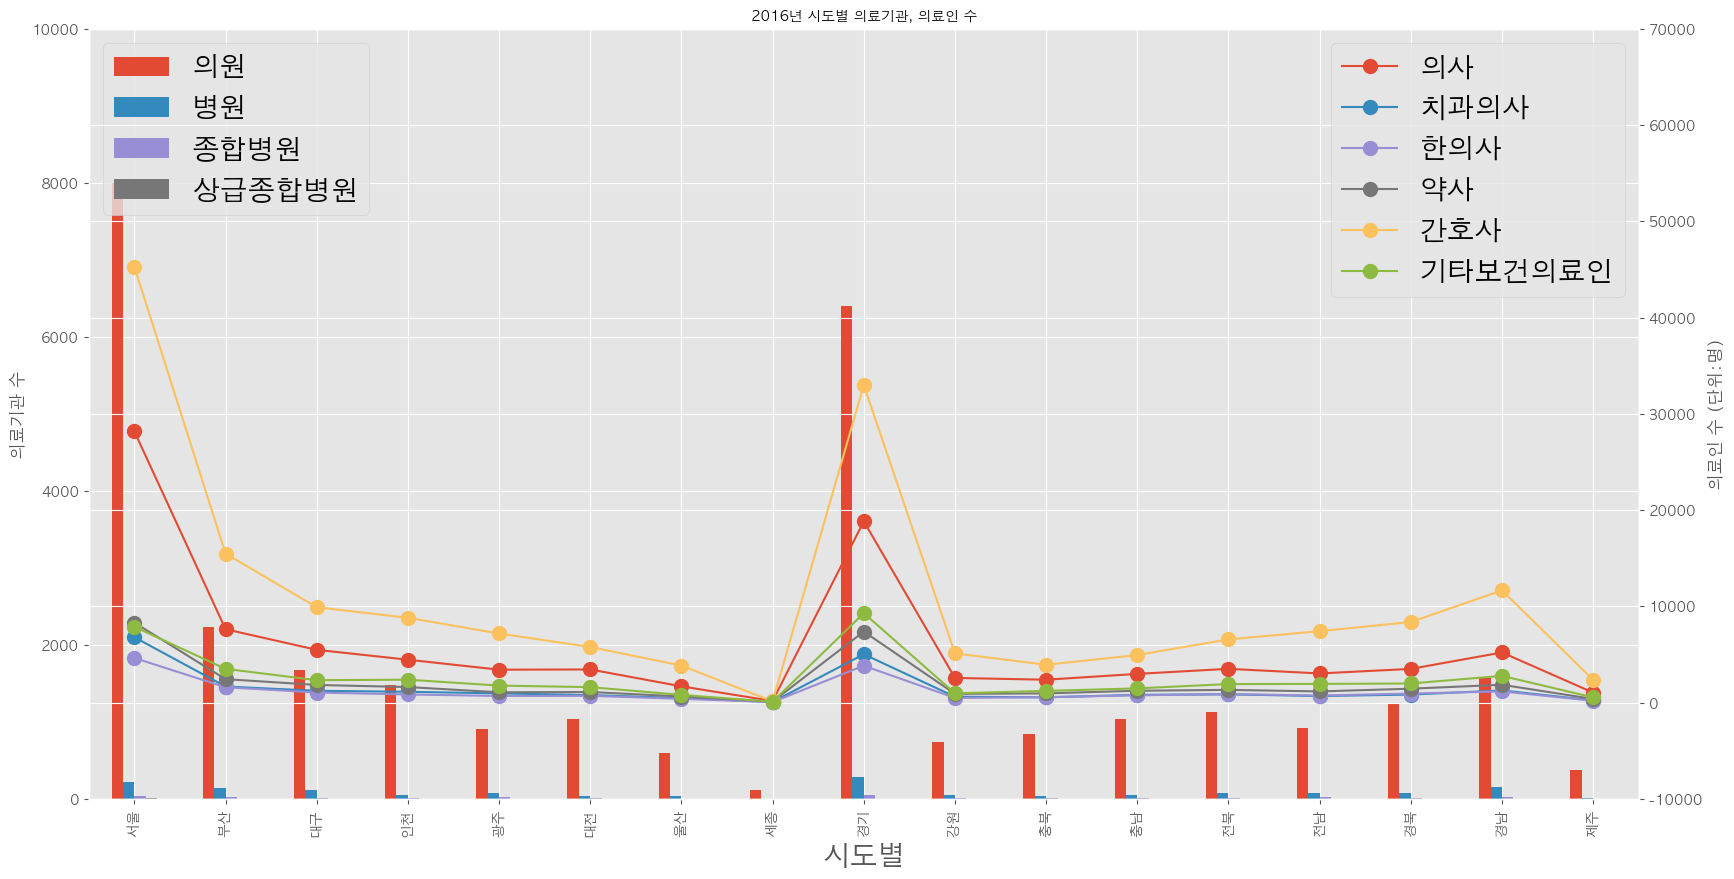

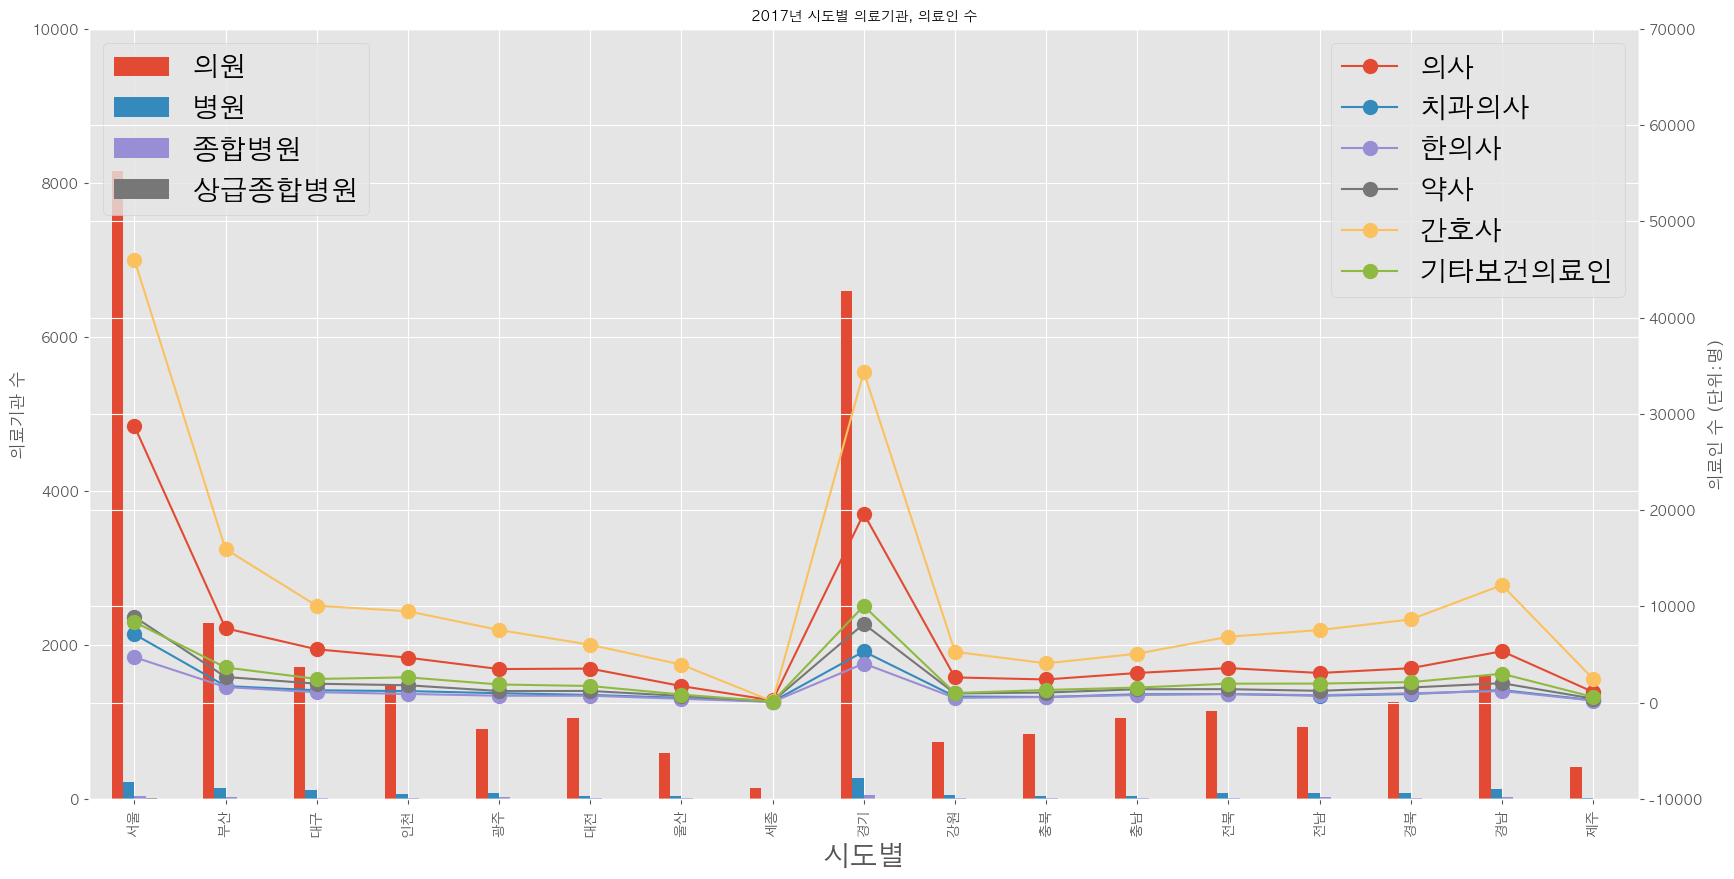

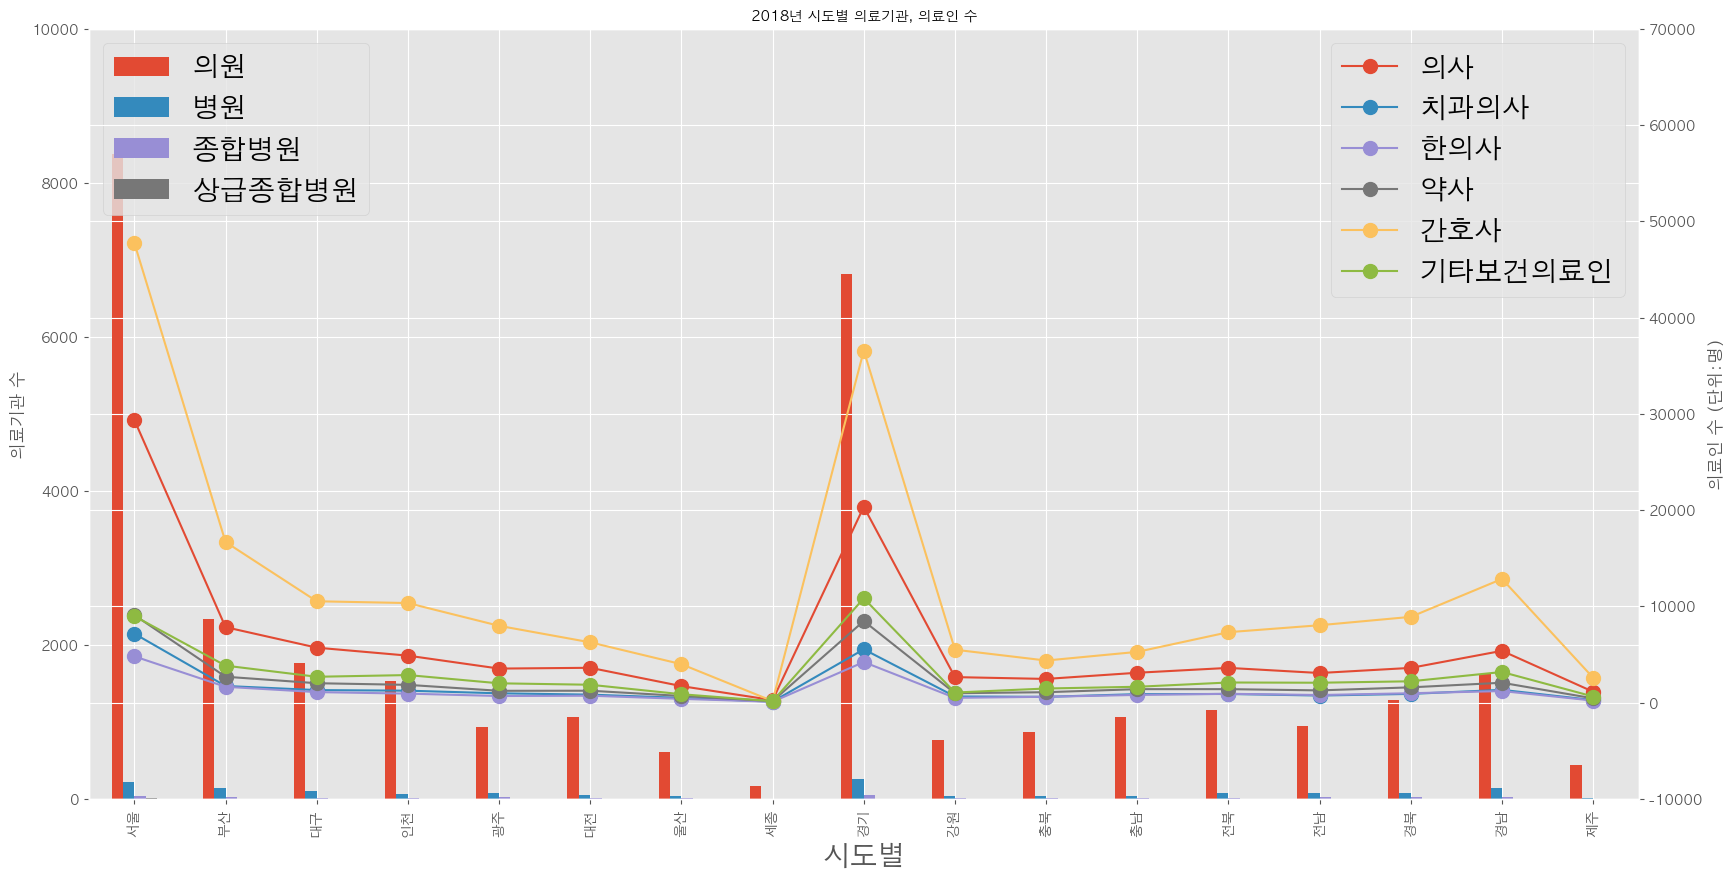

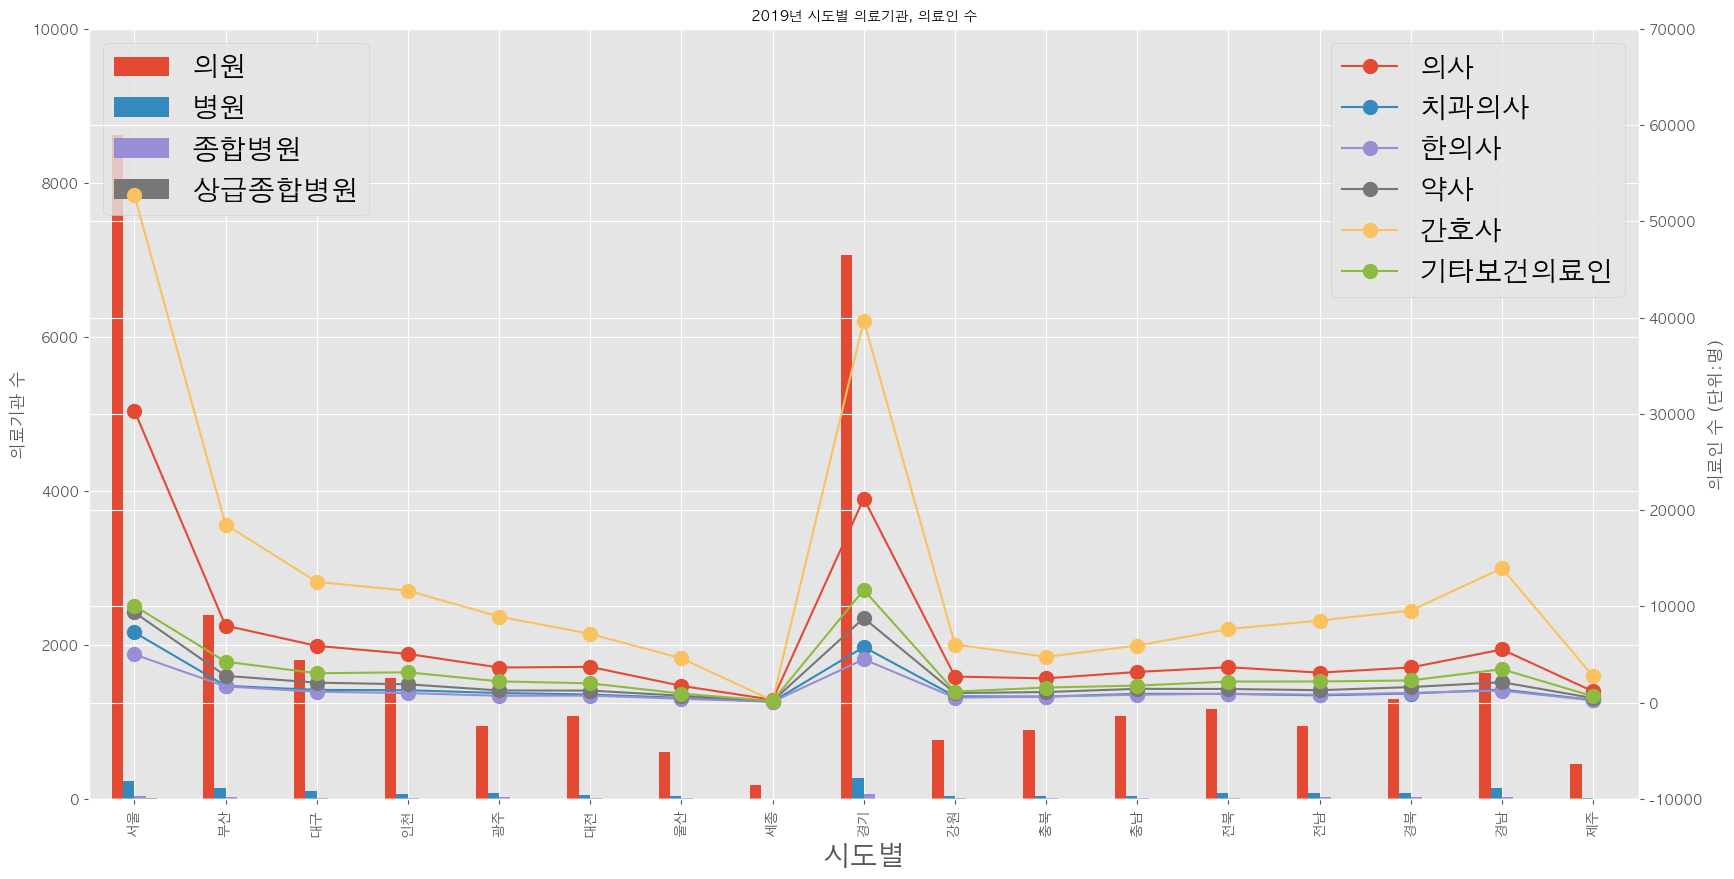

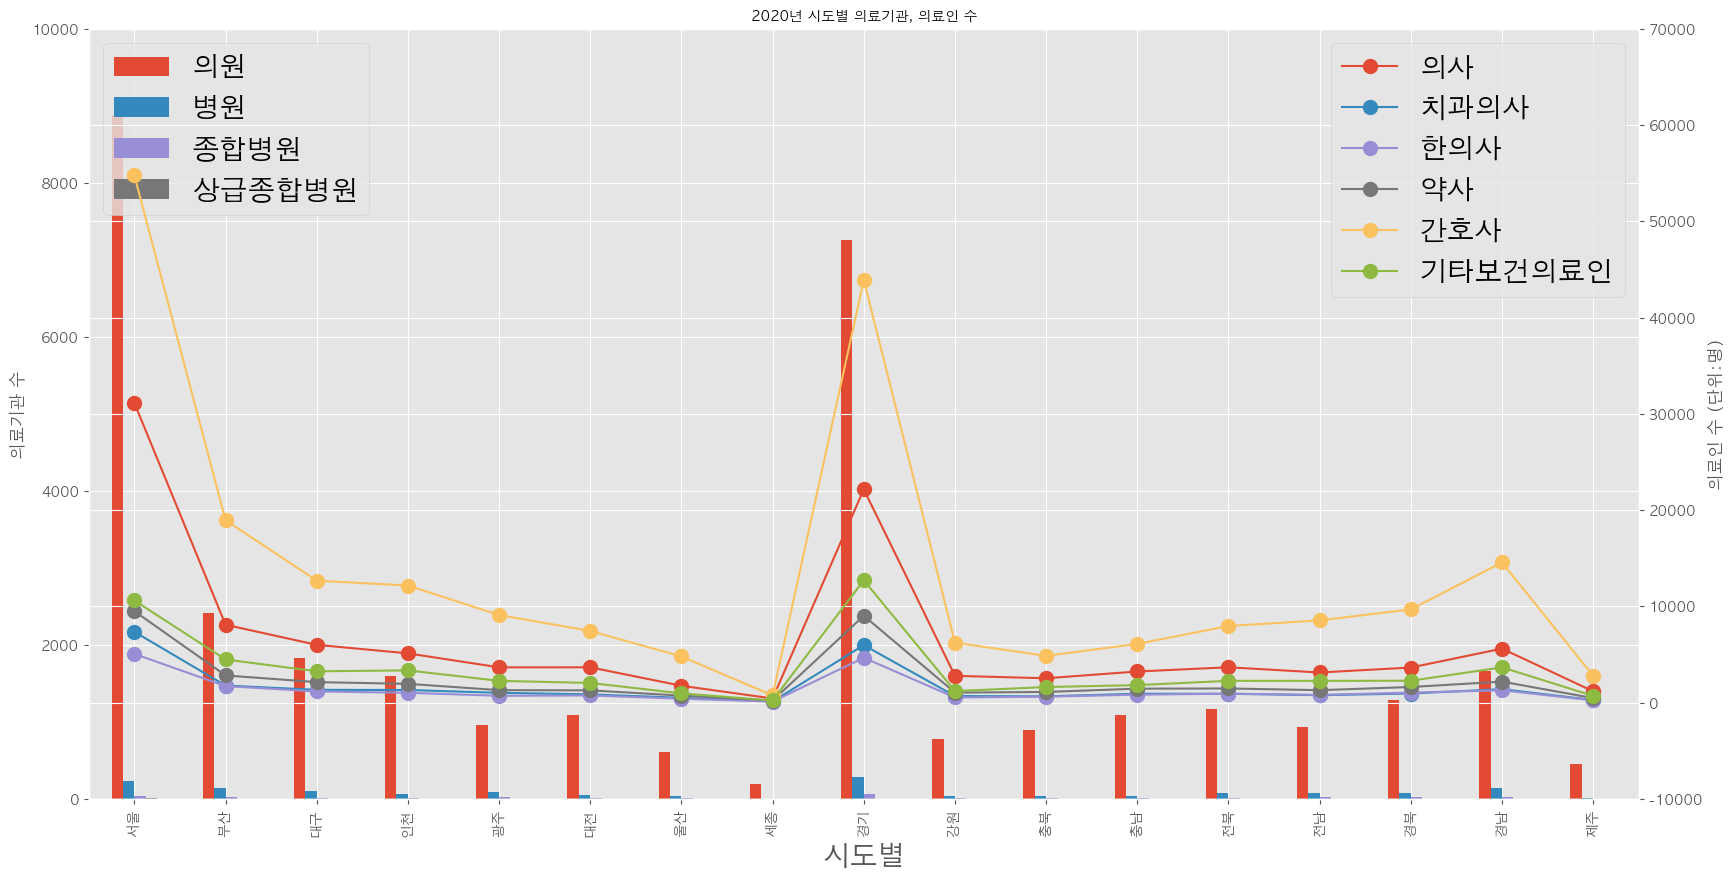

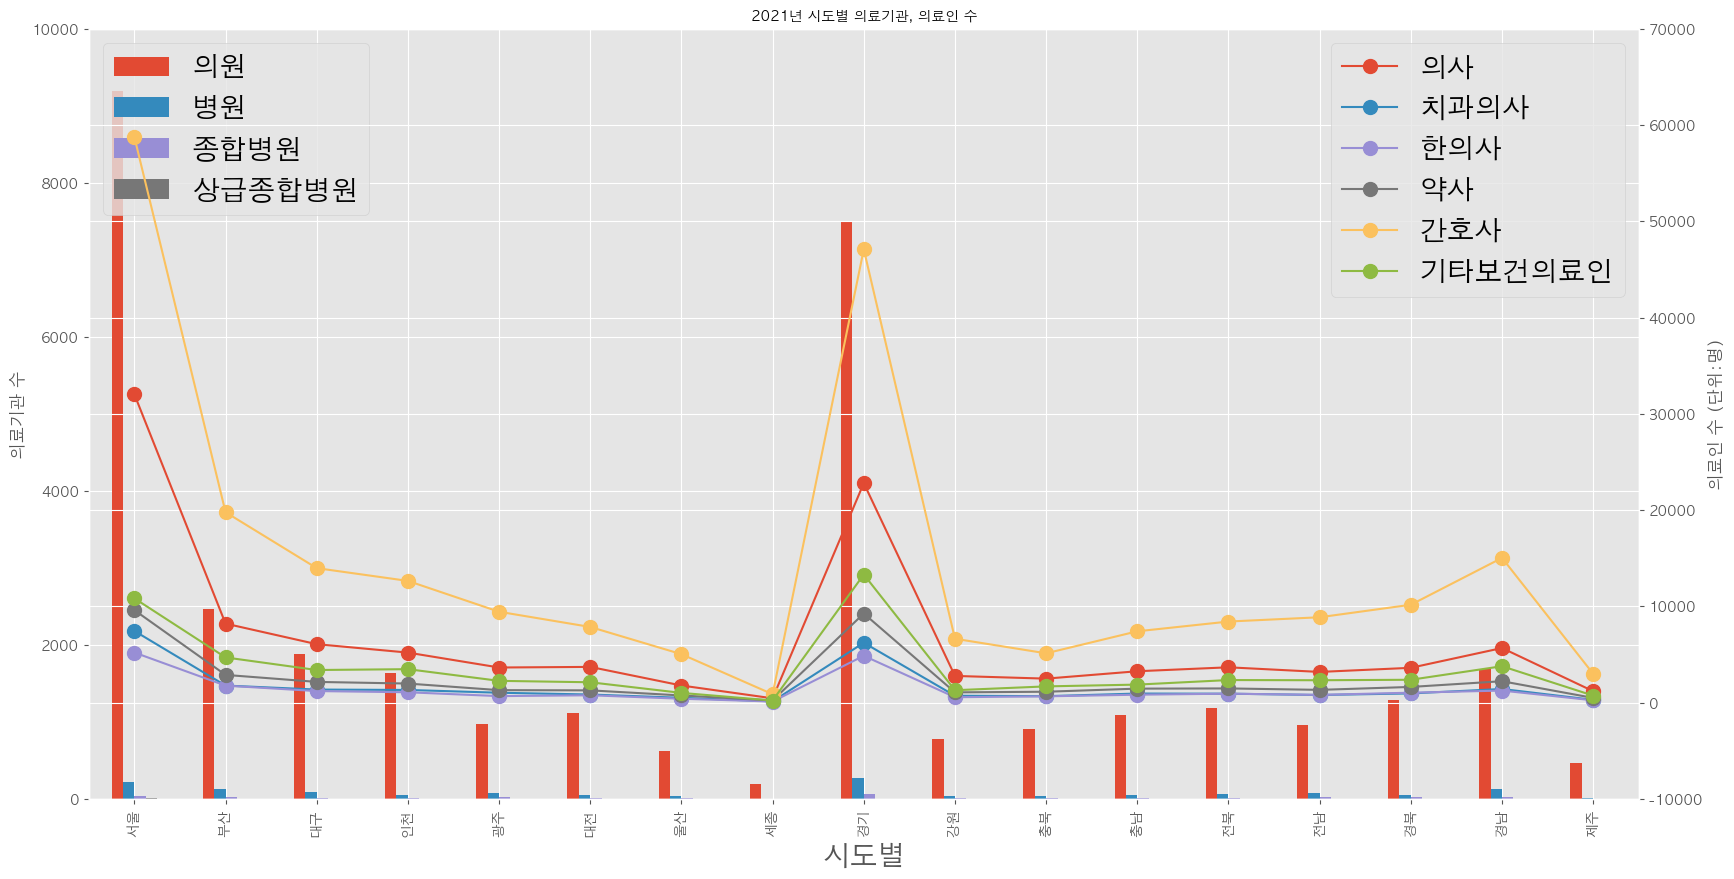

In [16]:
years = [y for y in range(2010,2022)]
# years = [y for y in range(2021,2022)]
plt.style.use('ggplot')

for year in years:
    titleyear = year
    
    ax1 = df[df['시점']==year][['의원','병원','종합병원','상급종합병원']].plot(
    # ax1 = df[df['시점']==year][['병원','종합병원','상급종합병원']].plot(
    kind='bar',
    figsize=(20,10),
    )
    ax2 = ax1.twinx() 
    ax2.plot(
        # df[df['시점']==year][['의사','치과의사','한의사','약사','간호사','기타보건의료인']],
        df[df['시점']==year][['의사','치과의사','한의사','약사','간호사','기타보건의료인']],
        ls='-', # line style
        marker = 'o',
        markersize = 10,
    )
    # ax3 = ax2.twinx() 
    # ax3.plot(
    #     df[df['시점']==year]['의원'],
    #     ls='-',
    #     marker = '^',
    #     markersize = 10,
    #     c='b'
    # )

    ax1.set_ylabel('의료기관 수')
    ax2.set_ylabel('의료인 수 (단위:명)')
    ax1.set_xlabel('시도별',size = 20)
    ax1.set_ylim(0, 10000)
    ax2.set_ylim(-10000, 70000)
    # ax3.set_ylim(-10000, 70000)

    ax1.legend(loc="upper left", fontsize=20)
    ax2.legend(labels=['의사','치과의사','한의사','약사','간호사','기타보건의료인'],loc="upper right", fontsize=20)
    plt.title('%d년 시도별 의료기관, 의료인 수'%titleyear, size = 10)
    plt.xticks(rotation=300)
    plt.show()

In [17]:
df.to_csv('../../Data/public health/public_health10_21.csv', encoding='utf-8', index=True)

In [ ]:
# # hospital['시점'] = hospital.indexh
# # 컬럼 시도별을 서울->서울 특별시로 변경
# # 세종특별자치시가 없는 년도가 있어서 일일이 수동으로 변경 

# hos2010 = hospital[hospital['시점'] == 2010]
# hos2011 = hospital[hospital['시점'] == 2011]
# hos2012 = hospital[hospital['시점'] == 2012]
# hos2013 = hospital[hospital['시점'] == 2013]
# hos2014 = hospital[hospital['시점'] == 2014]
# hos2015 = hospital[hospital['시점'] == 2015]
# hos2016 = hospital[hospital['시점'] == 2016]
# hos2017 = hospital[hospital['시점'] == 2017]
# hos2018 = hospital[hospital['시점'] == 2018]
# hos2019 = hospital[hospital['시점'] == 2019]
# hos2020 = hospital[hospital['시점'] == 2020]
# hos2021 = hospital[hospital['시점'] == 2021]
# hos2022 = hospital[hospital['시점'] == 2022]
# ---
# concat = pd.concat([hos2010,hos2011,hos2012,hos2013,hos2014,hos2015,hos2016,hos2017,hos2018,hos2019,hos2020,hos2021,hos2022])
# concat.set_index('병원',inplace=True, drop=False)
# concat
# -----
# print(hosPeople['시도별'].unique())
# print(NexAreaName)
# hospital.replace(preAreaName,NexAreaName, inplace=True)
# hosPeople.replace(preAreaName,NexAreaName, inplace=True)
# -----
# hospital['시점'] = hospital.indexh
# hosPeople2010 = hosPeople[hosPeople['시점'] == 2010]
# hosPeople2011 = hosPeople[hosPeople['시점'] == 2011]
# hosPeople2012 = hosPeople[hosPeople['시점'] == 2012]
# hosPeople2013 = hosPeople[hosPeople['시점'] == 2013]
# hosPeople2014 = hosPeople[hosPeople['시점'] == 2014]
# hosPeople2015 = hosPeople[hosPeople['시점'] == 2015]
# hosPeople2016 = hosPeople[hosPeople['시점'] == 2016]
# hosPeople2017 = hosPeople[hosPeople['시점'] == 2017]
# hosPeople2018 = hosPeople[hosPeople['시점'] == 2018]
# hosPeople2019 = hosPeople[hosPeople['시점'] == 2019]
# hosPeople2020 = hosPeople[hosPeople['시점'] == 2020]
# hosPeople2021 = hosPeople[hosPeople['시점'] == 2021]
# -----
# Peopleconcat = pd.concat([hosPeople2010,hosPeople2011,hosPeople2012,hosPeople2013,hosPeople2014,hosPeople2015,
#                     hosPeople2016,hosPeople2017,hosPeople2018,hosPeople2019,hosPeople2020,hosPeople2021])
# Peopleconcat = Peopleconcat[Peopleconcat['시도별'] != '계']
# Peopleconcat.set_index('의사',inplace=True, drop=False)
# Peopleconcat
# -----
# resultDF = pd.merge(left=concat, right=Peopleconcat, how='left', on=['시점','시도별'])
# resultDF.set_index('시점',inplace=True, drop=True)
# resultDF = resultDF[['시도별','의원','병원','종합병원','상급종합병원','의사','치과의사','한의사','약사','간호사','기타보건의료인']]
# resultDF